# Cuaderno para probar el reconocimiento de habla

### Rafael Mejía Zuluaga
### Marcos Loaiza Arias

## Descarga del modelo y de archivo con funciones:

In [ ]:
#  https://drive.google.com/file/d/1w1lCBcy2CuJyg6xplIEnXJcwY9Ez45Kx/view?usp=sharing
 
FILEID = "1w1lCBcy2CuJyg6xplIEnXJcwY9Ez45Kx"
#1sui-FJI5znNJuQOk0whM6PALI89XfKss
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O Codigos.zip && rm -rf /tmp/cookies.txt
!unzip Codigos.zip
!dir

--2020-12-09 04:42:18--  https://docs.google.com/uc?export=download&confirm=&id=1w1lCBcy2CuJyg6xplIEnXJcwY9Ez45Kx
Resolving docs.google.com (docs.google.com)... 108.177.97.101, 108.177.97.113, 108.177.97.102, ...
Connecting to docs.google.com (docs.google.com)|108.177.97.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0o-6c-docs.googleusercontent.com/docs/securesc/ggndd3r6t6m07u2ldqa1p19filfetk4j/rqpq16blkepslclcs942qgrd8idpfdfs/1607488875000/10854142796765961935/08644902507657320031Z/1w1lCBcy2CuJyg6xplIEnXJcwY9Ez45Kx?e=download [following]
--2020-12-09 04:42:20--  https://doc-0o-6c-docs.googleusercontent.com/docs/securesc/ggndd3r6t6m07u2ldqa1p19filfetk4j/rqpq16blkepslclcs942qgrd8idpfdfs/1607488875000/10854142796765961935/08644902507657320031Z/1w1lCBcy2CuJyg6xplIEnXJcwY9Ez45Kx?e=download
Resolving doc-0o-6c-docs.googleusercontent.com (doc-0o-6c-docs.googleusercontent.com)... 74.125.204.132, 2404:6800:4008:c04::84
Connecting to 

In [ ]:
!pip install python_speech_features
!pip install ffmpeg-python
 
import sys
sys.path.insert(1, './Codigos')
 
from joblib import load, dump
 
from SpeechFunctions import *
from python_speech_features import mfcc
from scipy.signal import stft, welch
import pandas as pd

  Created wheel for python-speech-features: filename=python_speech_features-0.6-cp36-none-any.whl size=5887 sha256=00f512a307b31e584c221a831228c5e5d857d7e92b610ac8d26a730bb7e53a84
  Stored in directory: /root/.cache/pip/wheels/3c/42/7c/f60e9d1b40015cd69b213ad90f7c18a9264cd745b9888134be
Successfully built python-speech-features


In [ ]:
 loaded = load("Codigos/speech_model7.joblib")

In [ ]:
best_model_3 = loaded['best_model_7']
labels = loaded['labels']

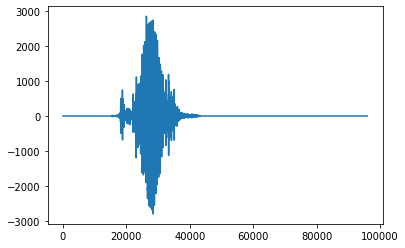

Arriba

Class Probabilities:


,Probability
Arriba,0.44
Abajo,0.16
Izquierda,0.10
Derecha,0.12
Back,0.11
Ok,0.07


In [ ]:
Xnew,fs = get_audio()
Xnew = np.pad(Xnew,(0,2*fs-Xnew.shape[0]),'constant',constant_values=(0,0))
 
 
pred = best_model_3.predict(Xnew)
 
plt.plot(Xnew)
plt.show()
 
probabilities = best_model_3.predict_proba(Xnew)
 
print(labels[int(pred)])
print("\nClass Probabilities:")
class_probabilities = pd.DataFrame(data=probabilities.reshape(-1),index=labels,columns=['Probability'])
class_probabilities